In [1]:
%matplotlib inline      
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import statistics as st
import re
from scipy import stats
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # default='warn'
autosear=False

<h2>Data Cleaning</h2>

Our dataframe is already relatively clean, but some cleansing tasks are nevertheless necessary which we perform below:

<p>A cursory look at our dataframe shows that most or all the cells in the 'Over18' column appear to be Y. Since the sum() command shows that there are zero cells in this column with a value other than Y, we can delete this column since it provides us with no meaningful insight in relation to the other columns. There is little use in having a column in which all its cells have the same value.</p>
<p>Similarly, we can also see that all cells in the EmployeeCount and StandardHours columns all have the same value, so we delete these columns as well.

In [2]:
#There are zero cells in the Over18 column with a value other than Y, so we delete this column.
print("Number of cells in column Over18 which have a value other than Y: "+str((df['Over18']!='Y').sum()))
print("Number of cells in column EmployeeCount which have a value other than one: "+str((df['EmployeeCount']!=1).sum()))
print("Number of cells in column StandardHours which have a value other than eighty: "+str((df['StandardHours']!=80).sum()))
print("Deleting Columns 'EmployeeCount', 'Over18', and 'StandardHours'.")
if 'Over18' in df.columns: df.drop('Over18', axis=1, inplace=True)
if 'EmployeeCount' in df.columns: df.drop('EmployeeCount', axis=1, inplace=True)
if 'StandardHours' in df.columns: df.drop('StandardHours', axis=1, inplace=True)

Number of cells in column Over18 which have a value other than Y: 0
Number of cells in column EmployeeCount which have a value other than one: 0
Number of cells in column StandardHours which have a value other than eighty: 0
Deleting Columns 'EmployeeCount', 'Over18', and 'StandardHours'.


<p> In addition, we observe that the EmployeeNumber column values are merely in ascending order as we go down the rows, and do not reflect any meaningful information. Therefore, we delete this column as well.<p>

In [3]:
print("Deleting Column 'EmployeeNumber'.")
if 'EmployeeNumber' in df.columns: df.drop('EmployeeNumber', axis=1, inplace=True)

Deleting Column 'EmployeeNumber'.


Our next step in cleaning the data is to make sure there are no blank cells. The below code counts the number of blank cells in the entire dataframe. 

In [4]:
i=0
for column in df.columns[::-1]:
    i=i+df[column].isnull().sum()
print("Number of empty cells in the dataframe: "+str(i))

Number of empty cells in the dataframe: 0


One of the biggest issues with our dataframe is that lots of quantitative information is displayed numerically. For example, the 'Education' field is displayed on a scale of 1-5, which is poor method of relaying this information. We replace these numerical values with the fields, 'High School', 'Diploma', 'Bachelors', 'Masters', and 'Doctorate'. (This information was obtained from kaggle.com)

We insert similar categorical replacements for the columns Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, RelationshipSatisfaction, PerformanceRating, and WorkLifeBalance, all of which previously had numerical values. In addition to this, we make attrition our first column in our dataframe because attrition is the main issue we will be focusing on. We make the values for attrition '1' for 'Yes', and '0' for 'No'. We do this so that linear regression can be readily applied with our attrition data.

In [5]:

cleanup_data= {"Education":     {1: "High School", 2: "Diploma", 3: "Bachelors", 4: "Masters", 5: "Doctorate"},
               "EnvironmentSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
               "JobInvolvement": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
               "JobSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
               "RelationshipSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
               "PerformanceRating": {1: "Poor", 2: "Satisfactory", 3: "Good", 4: "Excellent"},
               "WorkLifeBalance": {1: "Poor", 2: "Satisfactory", 3: "Good", 4: "Excellent"},
               "Attrition": {"Yes": 1, "No": 0}}
             
if autosear==False: df.replace(cleanup_data, inplace=True)
autosear=True
columnsdf=df.columns.values.tolist()
columnsdf[0]="Attrition"
columnsdf[1]="Age"
df=df.reindex(columns=columnsdf)

In [6]:
dfstats=df.describe()
dfstats.drop('count', inplace=True)
dfstats

,Attrition,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
mean,0.161224,36.923810,802.485714,9.192517,65.891156,2.063946,6502.931293,14313.103401,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,20.329428,1.106940,4707.956783,7117.786044,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,48.000000,1.000000,2911.000000,8047.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,66.000000,2.000000,4919.000000,14235.500000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,83.750000,3.000000,8379.000000,20461.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,100.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


<b>Removing Outliers</b>

Our next step in data cleaning is to remove outliers. The above spreadsheet has contains statistical information about each of the columns in our dataframe .We will replace outliers with either the median or the mean of the relevant data, whichever is more appropriate for the given outlier. For our purposes, we will define an outlier to be data which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile. Observing the above spreadsheet, we can observe that some columns do not have any outliers. Obviously, we do not need to clean those columns by removing outliers and replacing them with the median. 

In [7]:
#Cleaning 'Age' 
columnname="Age"
interquartilerange=dfstats[columnname]['75%']-dfstats[columnname]['25%']
minimum=dfstats[columnname]['25%']-(interquartilerange*1.5)
maximum=dfstats[columnname]['75%']+(interquartilerange*1.5)
median=dfstats[columnname]['50%']
mean=median=dfstats[columnname]['mean']
for index, row in df.Age.iteritems():
    if row < minimum or row > maximum:
        df.Age.loc[index] = median
        
for index, row in df.YearsAtCompany.iteritems():
    if row < 8 and row > 7:
        df.Age.loc[index] = 7

#Cleaning 'MonthlyIncome'
columnname="MonthlyIncome"
interquartilerange=dfstats[columnname]['75%']-dfstats[columnname]['25%']
minimum=dfstats[columnname]['25%']-(interquartilerange*1.5)
maximum=dfstats[columnname]['75%']+(interquartilerange*1.5)
median=dfstats[columnname]['50%']
mean=median=dfstats[columnname]['mean']
for index, row in df.MonthlyIncome.iteritems():
    if row < minimum or row > maximum:
        df.MonthlyIncome.loc[index] = median
        
#Cleaning 'HourlyRate'
columnname="HourlyRate"
interquartilerange=dfstats[columnname]['75%']-dfstats[columnname]['25%']
minimum=dfstats[columnname]['25%']-(interquartilerange*1.5)
maximum=dfstats[columnname]['75%']+(interquartilerange*1.5)
median=dfstats[columnname]['50%']
mean=median=dfstats[columnname]['mean']
for index, row in df.HourlyRate.iteritems():
    if row < minimum or row > maximum:
        df.HourlyRate.loc[index] = median
        
#Cleaning 'MonthlyRate'
columnname="MonthlyRate"
interquartilerange=dfstats[columnname]['75%']-dfstats[columnname]['25%']
minimum=dfstats[columnname]['25%']-(interquartilerange*1.5)
maximum=dfstats[columnname]['75%']+(interquartilerange*1.5)
median=dfstats[columnname]['50%']
mean=median=dfstats[columnname]['mean']
for index, row in df.MonthlyRate.iteritems():
    if row < minimum or row > maximum:
        df.MonthlyRate.loc[index] = median
        
#Cleaning'YearsAtCompany'
columnname="YearsAtCompany"
interquartilerange=dfstats[columnname]['75%']-dfstats[columnname]['25%']
minimum=dfstats[columnname]['25%']-(interquartilerange*1.5)
maximum=dfstats[columnname]['75%']+(interquartilerange*1.5)
median=dfstats[columnname]['50%']
mean=median=dfstats[columnname]['mean']
for index, row in df.YearsAtCompany.iteritems():
    if row < minimum or row > maximum:
        df.YearsAtCompany.loc[index] = median
        
#Cleaning'YearsSinceLastPromotion'
columnname="YearsSinceLastPromotion"
interquartilerange=dfstats[columnname]['75%']-dfstats[columnname]['25%']
minimum=dfstats[columnname]['25%']-(interquartilerange*1.5)
maximum=dfstats[columnname]['75%']+(interquartilerange*1.5)
median=dfstats[columnname]['50%']
mean=median=dfstats[columnname]['mean']
for index, row in df.YearsSinceLastPromotion.iteritems():
    if row < minimum or row > maximum:
        df.YearsSinceLastPromotion.loc[index] = median
        
#Cleaning'YearsWithCurrManager'
columnname="YearsWithCurrManager"
interquartilerange=dfstats[columnname]['75%']-dfstats[columnname]['25%']
minimum=dfstats[columnname]['25%']-(interquartilerange*1.5)
maximum=dfstats[columnname]['75%']+(interquartilerange*1.5)
median=dfstats[columnname]['50%']
mean=median=dfstats[columnname]['mean']
for index, row in df.YearsWithCurrManager.iteritems():
    if row < minimum or row > maximum:
        df.YearsWithCurrManager.loc[index] = median
        
#Cleaning'YearsInCurrentRole'
columnname="YearsInCurrentRole"
interquartilerange=dfstats[columnname]['75%']-dfstats[columnname]['25%']
minimum=dfstats[columnname]['25%']-(interquartilerange*1.5)
maximum=dfstats[columnname]['75%']+(interquartilerange*1.5)
median=dfstats[columnname]['50%']
mean=median=dfstats[columnname]['mean']
for index, row in df.YearsInCurrentRole.iteritems():
    if row < minimum or row > maximum:
        df.YearsInCurrentRole.loc[index] = median
        
#Cleaning'TotalWorkingYears'
columnname="TotalWorkingYears"
interquartilerange=dfstats[columnname]['75%']-dfstats[columnname]['25%']
minimum=dfstats[columnname]['25%']-(interquartilerange*1.5)
maximum=dfstats[columnname]['75%']+(interquartilerange*1.5)
median=dfstats[columnname]['50%']
mean=median=dfstats[columnname]['mean']
for index, row in df.TotalWorkingYears.iteritems():
    if row < minimum or row > maximum:
        df.TotalWorkingYears.loc[index] = median

#Columns which do not have outliers have not been cleaned in this manner.     

<h2>Insights</h2>
<p>Now that we have completed our data cleaning process, we use visualization techniques to gather insights about our dataframe. In particular, we will try focus on what factors leads to attrition, and what measures could potentially reduce attrition.</p>
    
<p>Attrition refers to the phenomenon of employees leaving the company due to reasons such as dissatisfaction, unsatisfactory pay, overtime, toxic work environment, etc. Attrition is a significant concern as it costs the company a significant amount of time and money. Attrition is also a simptom of larger issues that linger in the company.</p>
    
<p>In addition to attrition, we will also try to gain insights with regards to what corelations exist with regards to employees' income and productivity rates.

<b>First, let's get a sense of the demographics of IBM employees</b>

Getting a feel for the population of our sample will prepare us to discover more insights. Below, we can see the proportion of female and male employees at IBM.

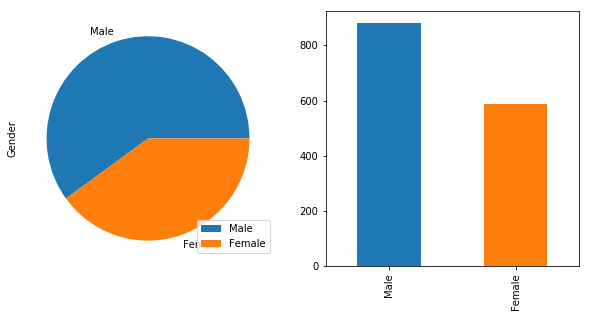

In [8]:
z=df.Gender.value_counts()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4.7))
z.plot(y=0, kind = 'pie', ax = axes[0])
z.plot(kind = 'bar', ax = axes[1])
axes[0].legend(loc=1, bbox_to_anchor= (1,0.2))
plt.show()

The Second plot is a bar plot which shows the count of Male and Female Employees. The Male count in the company is considerably greater than the female count.This can be due to various factors such as <b>Education, Distance from Home, Marital Status, Environment Satisfaction, Overtime and Salary</b> which we will try to infer further. 

<strong>Lets analyse how the Age of the Employees are distributed using a simple histogram taking Age along X-axis and frequency(the bin width being equal) along the Y-axis </strong>

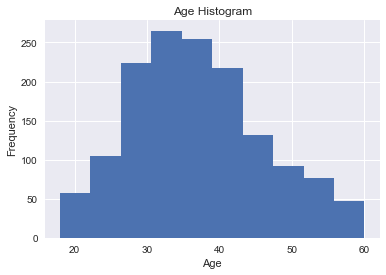

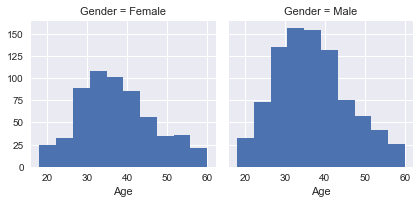

In [9]:
sns.set()
plt.hist(df.Age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.show()
grid = sns.FacetGrid(df, col='Gender')
grid.map(plt.hist, 'Age')
plt.show()

The above plot comes out to be almost a Normal bell curve histogram, although it is slightly skewed to the right. We see that a large number of employees fall under the age group of 30 to 45 which seems quite obvious as companies usually hire and retain employees with considerable amount of Experience rather than inexperienced professionals.

And the final graph shows us the Age distribution in Males and Females separately where the distributions are approproximately the same. Thus, <b>there is no significant corelation between age and gender</b> in our sample of IBM employees.
<br>
<br>
<b><ul>Attrition</ul></b>

<b>Fist, let's get some basic statistical values with regards to attrition to get a preliminary understanding of what the underlying issues are that could lead to attrition.</b>

In [10]:
print(df.groupby('Attrition').size())
#Summary based on Attrition
df1=df.groupby('Attrition')
df1.mean()

Attrition
0    1233
1     237
dtype: int64


,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,65.952149,2.145985,5785.356457,14265.779400,2.645580,15.231144,0.845093,10.871222,2.832928,6.134442,4.301181,1.558515,4.230920
1,33.607595,750.362869,10.632911,65.573840,1.637131,4513.656778,14559.308017,2.940928,15.097046,0.527426,7.731637,2.624473,4.308361,2.812061,1.419582,2.852321


Even though the number of employees with Attrition  is less compared to those without attrition,<b> 237 out of 1470 i.e 16.12% </b>of employees cannot be easily neglected as employee attrition is a loss to company, in both monetary and non-monetary.

So lets try to make a few visualizations in order to figure out a<b> few factors which may strongly lead to employee Attrition</b> which not only helps the Company but also the employee.

<function matplotlib.pyplot.show>

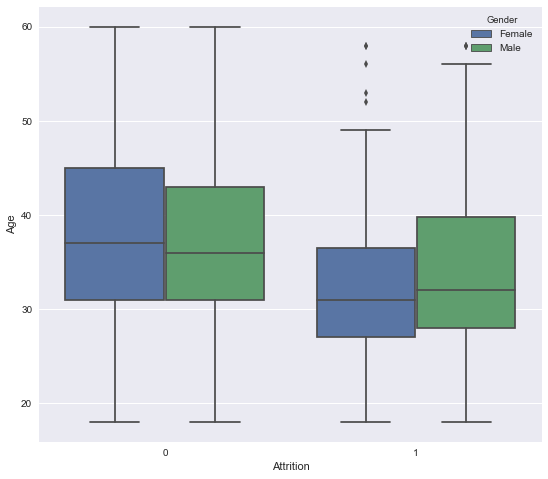

In [39]:
plt.figure(figsize=(9, 8))
(sns.boxplot(x="Attrition",y="Age",hue='Gender',data=df))
plt.show

A clear insight from the above plot is that<b> attrited employees are slightly younger than non-attrited employee, although this corelation isn't very strong.</b> We can only speculate as to the cause, perhaps younger employees are more willing to change jobs due to lesser familial responsibility and similar reasons.

First, let's get a sense of how prevelant traveling is among IBM employees. We can see from our pie chart below that the overwhelming majority of employees never travel, or only seldom travel. 

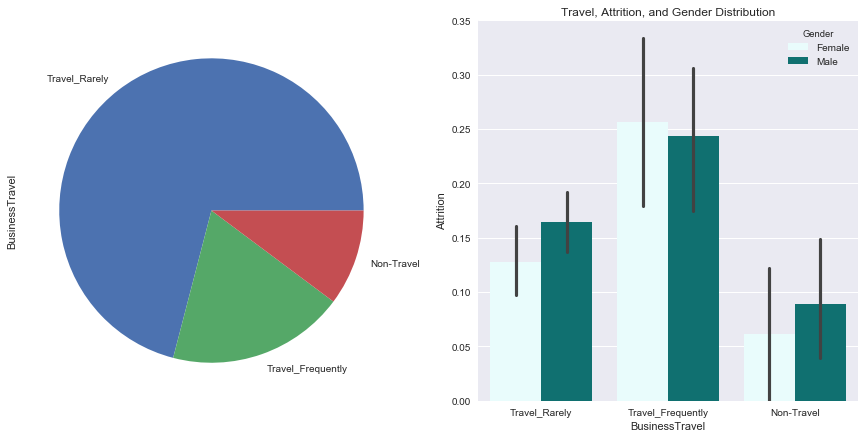

In [12]:
z=df.BusinessTravel.value_counts()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
z.plot(y=0, kind = 'pie', ax = axes[0])
sns.barplot(x='BusinessTravel',y='Attrition',hue='Gender',data=df,color='Teal',ax=axes[1]).set_title('Travel, Attrition, and Gender Distribution')
plt.show()

We can make a few interesting conclusions from looking at the graphs above. 

1) First of all, we can clearly observe that there is a direct corelation between the frequency of an employee's business travel, and his chances of attrition. Non-travel has the lower attrition rates, followed by Travel Rarely, followed by Travel Frequently. This corelation exists regardless of gender. Therefore, <b>IBM should we wary of having employees travel too much, in order to reduce attrition</b>, since frequent business travel has a strong corelation with attrition. 


2) Another insight we can draw is that women tend to have lower attrition rates than men when they undergo business travel rarely or never, but they have a higher attrition rate than men when asked to travel frequently. In addition, women consistently have a longer confidence intervals, meaning they're more volatile when confronted with business travel. 

Therefore, <b>Women are more sensitive to travel than men</b>. This may be due to reasons such as personal responsibilities.

<b>IBM should be especially wary of assigning responsibilties that involve frequent travel to women employees to prevent them from undergoing attrition.</b>

Looking at the box plot below, we can see that females who stay with the company have higher income tham males, and womenwho have attrition have lower income than males.

<b>This indicates that men are more sensitive to their monthly income than female employees</b> Males appear to be more demanding in their desire for a higher income than females, although we can only speculate as to the cause of this.

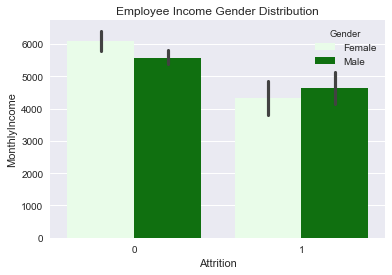

<Figure size 720x720 with 0 Axes>

In [13]:
sns.barplot(x='Attrition',y='MonthlyIncome',hue='Gender',data=df,color='green').set_title('Employee Income Gender Distribution')
plt.figure(figsize=(10, 10))
plt.show()

<b>Let's analyze the three different departments at IBM and gain some insights on their respective employees.</b>

As we can see in the above bar chart, R&D is by far the larget department, with well over half the company in it. The box plot to its right shows that employees with attrition earn significantly less money than those who stay with the company. Also note that the box plot of employees with attrition is right skewed, further reinforcing the corelation between income and attrition. 
<b>IBM should consider raising the pay of its employees to decrease the chances of attrition</b>

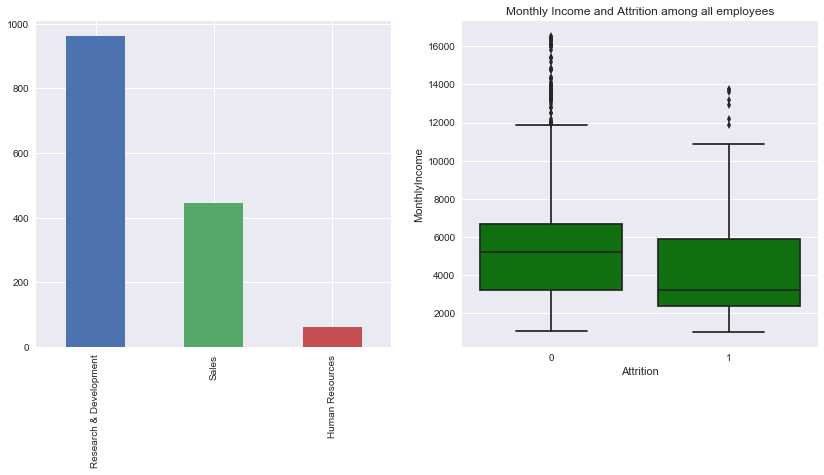

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
df.Department.value_counts().plot(kind = "bar", ax=axes[0])
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Bar Plot')
sns.boxplot(x='Attrition',y='MonthlyIncome',data=df,color='Green',ax=axes[1]).set_title('Monthly Income and Attrition among all employees')
fig.show()

<b>Let's dive deeper. Which department in particular should get a pay raise to decrease attrition?</b>

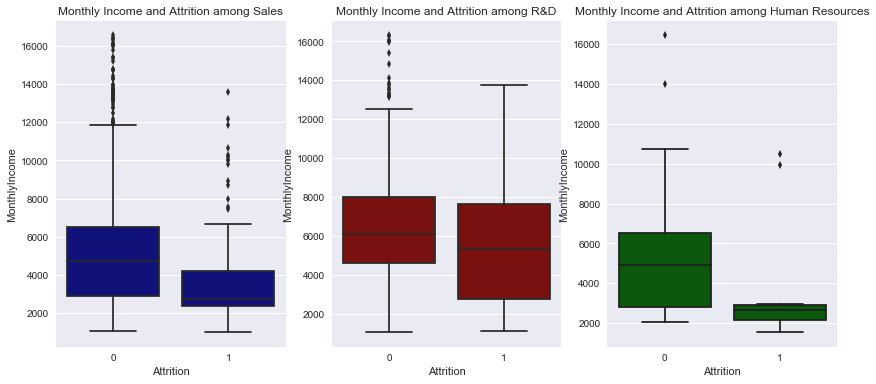

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,6))
dfem=df.loc[df['Department'] == 'Sales']
dfmn=df.loc[df['Department'] == 'Research & Development']
dfmm=df.loc[df['Department'] == 'Human Resources']
sns.boxplot(x='Attrition',y='MonthlyIncome',data=dfmn,color='DarkBlue',ax=axes[0]).set_title('Monthly Income and Attrition among Sales')
sns.boxplot(x='Attrition',y='MonthlyIncome',data=dfem,color='DarkRed',ax=axes[1]).set_title('Monthly Income and Attrition among R&D')
sns.boxplot(x='Attrition',y='MonthlyIncome',data=dfmm,color='DarkGreen',ax=axes[2]).set_title('Monthly Income and Attrition among Human Resources')
plt.show()

As we can see from the three box plots above, employees with attrition tend to earn less money in all three departments. Note, however, that the disparity in income is espeically significant in the Human Resources Department. It appears that a significant number of employees in HR might be being underpaid, and hence the large pay gap between those with and without attrition. 

<b>It seems like human resources employees are espeically sensitive to monthly income and are likely underpaid. IBM should consider increasing the monthly salary of HR employees to prevent attrition.</b>

Similarly, we can see that the difference in pay among those who have attrition in R&D is not as large. <b>This means that other factors, not the size of income, push R&D employees to attrition.</b> This is important, as it means that the salary of R&D employees is adequate but other factors in their work environment may need improvement to prevent attrition.  

<b>Let's dig deeper into the R&D department to see what causes its employees to have attrition, since income doesn't appear to be the main reason.</b>


Text(0.5,1,'Overtime and WorkLifeBalance Distribution in R&D Department')

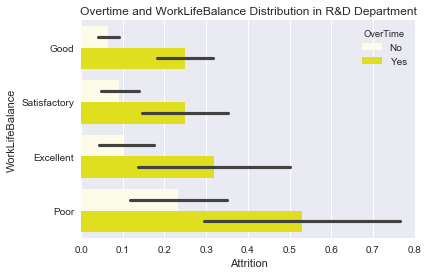

In [16]:
sns.barplot(x='Attrition',y='WorkLifeBalance',hue='OverTime',data=dfmn,color='Yellow').set_title('Overtime and WorkLifeBalance Distribution in R&D Department')

As you can see, two key factors in the attrition of R&D Employees is the work life balance and overtime, both of which corelate positively with attrition. This is a very stark corelation, and leads to the conclusion that R&D employees, while they are paid well, are perhaps overworked. The inclusion of overtime more than doubles the chances of attrition regardles of work life balance, so overtime should be restricted significantly to reduce attrition in the R&D Department. In fact, an employee who has poor work life balance and is also given overtime has a >50% chance of attrition! 
<ul><li>
<b>Thus, IBM should reduce the workload of R&D Department employees significantly to improve their work life balance.</b> 
    </li><li>
<b> Overtime should only be given when absolutely necessary, as it is corelates very strongly with attrition.</b>
    </li><li>
    <b> The pay of R&D employees is sufficient as seen above, but they may be overworked.</b></li>
</ul>

________________________________________________________________________________________________________________________
Now, let's see how the attrition in each department corelates with each gender. As you can see, attrition rates are fairly comprable for male employees across all three departments, although Sales is slightly higher than the other two.

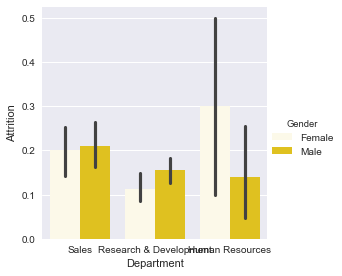

In [17]:
sns.factorplot(x="Department", y="Attrition", hue="Gender", data=df,kind="bar", ci = 95, color='Gold')
plt.show()

As you can see, men and women have comparable rate of attrition in Sales and R&D, but women are much more likely than men to undergo attrition in the Human Resouces department. We can only speculate why this is, perhaps due to poor work culture or stress. 

Therefore, <b>IBM should be cautious in hiring women employees for HR positions. There seems to be an issue with the HR department that drives female employees to attrition, and this should be investigated and rectified.</b>

<b>
    
DistanceFromHome & Gender vs Attrition </b>

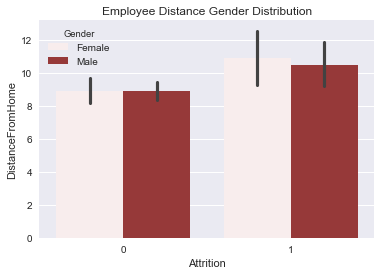

In [25]:
sns.barplot(x='Attrition',y='DistanceFromHome',hue='Gender',data=df,color='brown').set_title('Employee Distance Gender Distribution')
plt.show()

<ul><li>Employee with attrition tend to live slightly further away than those who remain with the company, althoug this corelation isn't particularly strong.</li></ul>

<b>
Years at company vs Attrition </b>

<Figure size 1080x576 with 0 Axes>

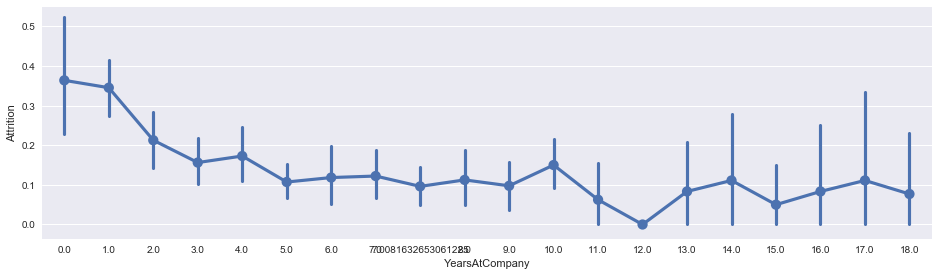

In [26]:
fig=plt.figure(figsize=(15,8))
value=df['YearsAtCompany']<25
df3=df[value]
sns.factorplot(x='YearsAtCompany',y='Attrition',data=df3,aspect=3.3)
fig.show()

<b> Employee YearswithCurrentManager vs Attrition </b>

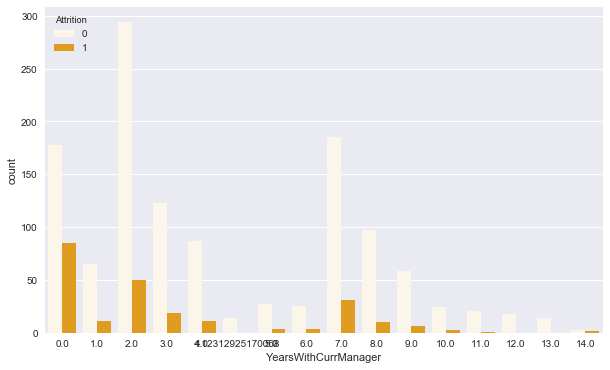

In [27]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='YearsWithCurrManager',hue='Attrition',data=df,color='orange')
plt.show()

<b>Employee YearsSinceLastPromotion vs Attrition</b>

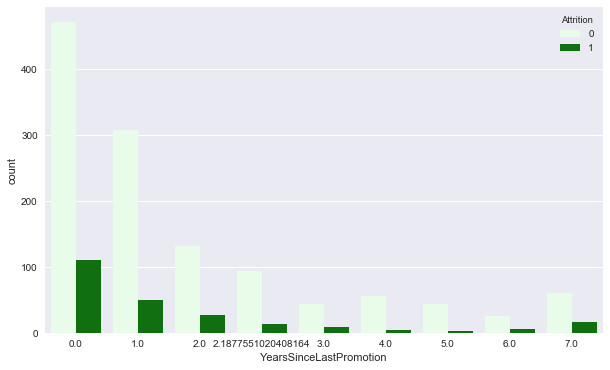

In [28]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=df,color='green')
plt.show()

From the above graphs, we see a strong negative corelation between the length of time an enployee has not experienced any change in his working experience, and his attrition probability.
Employees who have been with the same manager or company for a long time tend to be well-established in their position and thus have low attrition rates. However, employees who have gone seven years or longer without getting a promotion tend to have a higher attrition rate than those who have gone 3-6 without a promotion. This is likely due to the desire to avoid a stagnating career.

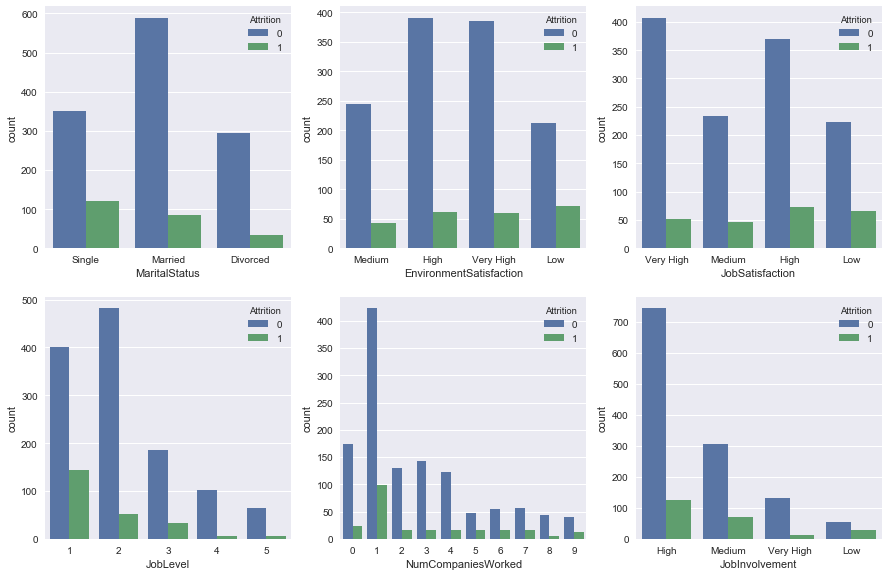

In [29]:
total_records= len(df)
columns = ["MaritalStatus","EnvironmentSatisfaction","JobSatisfaction",
           "JobLevel",'NumCompaniesWorked',"JobInvolvement"]
fig=plt.figure(figsize=(15,5))
j=0
for i in columns:
    j +=1
    plt.subplot(5,3,j)
    ax1 = sns.countplot(data=df,x= i,hue="Attrition",)
    if(j==9 or j== 10):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
    
plt.subplots_adjust(bottom=0.1, top=4)
plt.show()

A few insights from the graphs above:
<ul><li>
<b>There is a strong negative corelation between joblevel and attrition. Employees with a higher job level tend to have low attrition. 
    </li><br><br><li>
Single employees have higher attrition than married employees. This is likely due to the fact that single people have fewer committments in their personal lives and can afford to take risks. 
    </li>
<br><li>
IBM should improve their employees' environmental satisfaction to prevent attrition. There is a significant negative corelation between EnvironmentalSatisfaction and Attrition.</li>

<li>
Interestingly, employees who have worked for one company in the past have a higher attrition rate. This is likely due to inexperience and naivety among such employees, and due to the fact that they are probably younger and less likely to be married.</li> <ul>

<b>_______________________________________________________________________________</b>
<br>
<b>Let us now investigate what insights can be drawn from analyzing the daily rate.</b>

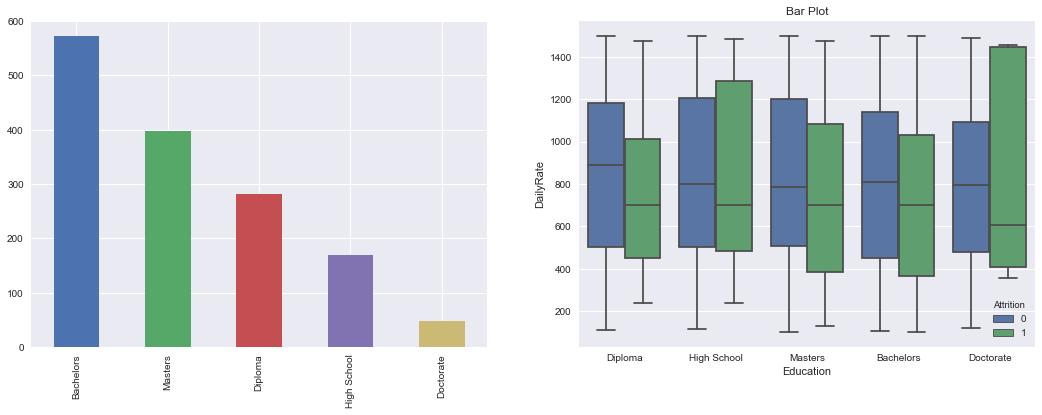

<Figure size 432x216 with 0 Axes>

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
df.Education.value_counts().plot(kind = "bar",ax=axes[0])
plt.xlabel('Education')
plt.ylabel('Number of Employees')
plt.title('Bar Plot')
plt.figure(figsize=[6,3])
sns.boxplot(x='Education',y='DailyRate',data=df,hue='Attrition',ax=axes[1])
plt.show()

Above, we explore the relationship between education level and DailyRate. Observing the bar chart, it is clear that Bachelors degrees are the most common education level among IBM employees, followed by Masterse and Diploma.

Looking at the box plot, we see that:
<ul><li>
<b>There is no significant relation between DailyRate and Education Level.</b> The box plots are comparable at each education level and are appropximately symmetric.</li><li>

<b>Therefore, hiring more educated employees is not an effective way for IBM to increase the DailyRate of its employees.
    </li><li>
In addition, workers who have lower DailyRate are more likely to undergo attrition. </b></li></ul>

<br>
<b>Let us investigate whether is a significant corelation between age and DailyRate.</b>

Text(0.5,1,'Age vs DailyRate Scatter Plot')

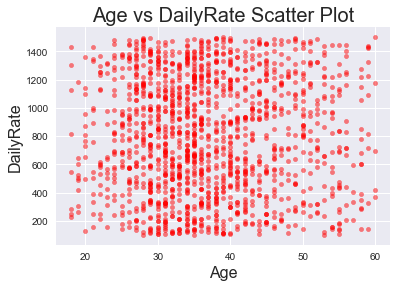

In [31]:
df.plot(kind='scatter', x='Age', y='DailyRate',alpha = 0.5,color = 'red')
plt.xlabel('Age', fontsize=16)  
plt.ylabel('DailyRate', fontsize=16)
plt.title('Age vs DailyRate Scatter Plot', fontsize=20)

We can see that there doesn't appear to be a significant corelation between Age and DailyRate. The scatterplot appears denser around age thirty, but that's only because the most employees are of that age group, and does not reflect on the DailyRate.

<b>Hiring younger or older employees is not an effective way for IBM to increase the DailyRate of its employees.</b>

Text(0.5,1,'Bar Plot')

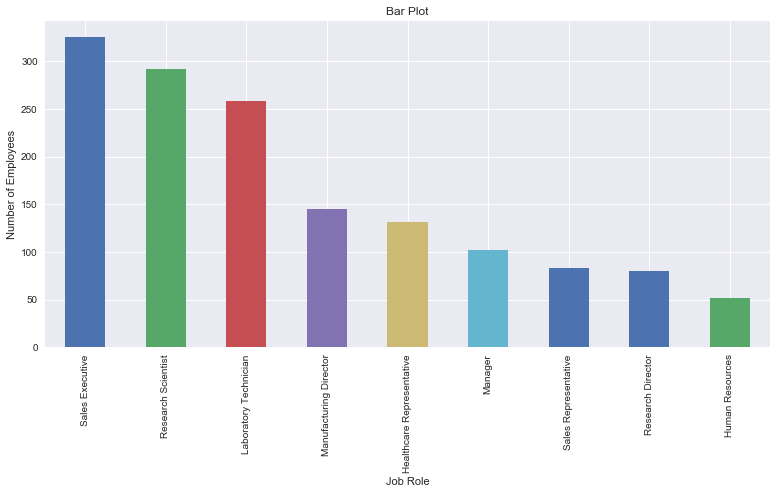

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(13,6))
df.JobRole.value_counts().plot(kind = "bar")
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.title('Bar Plot')

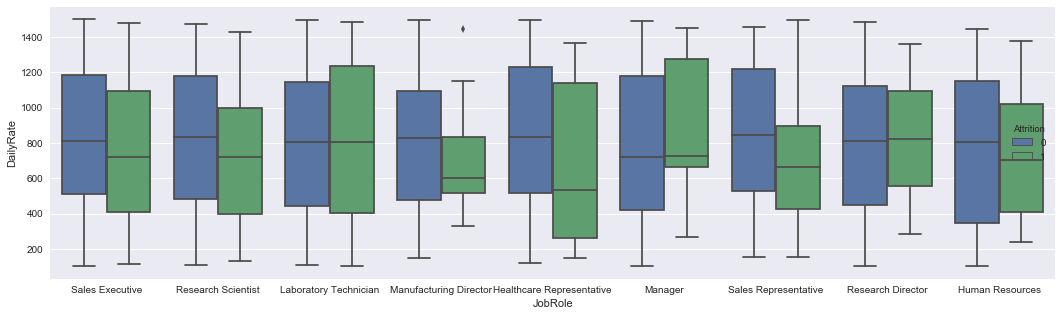

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18,5))
sns.boxplot(x='JobRole',y='DailyRate',data=df,hue='Attrition')
plt.show()

<ul><li><b>
Here, we can see that there is not a significant corelation between one's Job Role and one's daily rate (among employees without attrition). </li></ul></b>

Interestingly, we note that Laboratory Technicians and Managers with attrition have simliar daily rates to those who have not had attrition. DailyRate is not a significant factor that leads Managers and Technicians to have attrition. There are likely other causes that lead employees in these roles to have attrition.
